In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


In [175]:
train_data = pd.read_csv('X_train_HP')

In [176]:
train_data.head()


,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,208500,0.235294,0.75,0.150685,0.033420,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.9,0.9,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,181500,0.000000,0.75,0.202055,0.038795,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.1,0.2,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,223500,0.235294,0.75,0.160959,0.046507,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.9,0.9,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,140000,0.294118,0.75,0.133562,0.038561,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,250000,0.235294,0.75,0.215753,0.060576,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.9,0.9,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [156]:
#from sklearn.linear_model import Lasso
#rom sklearn.feature_selection import SelectFromModel

In [157]:
#### Feature Selection  ########
##the bigger the alpha, the less features will be selected

#feature_sel_model = SelectFromModel(Lasso(alpha = 0.05, random_state = 0))
#feature_sel_model.fit(X_train, y_train)
#feature_sel_model.get_support()



#only 3 features get selected

In [158]:
#####Selected features

#selected_feat = X_train.columns[(feature_sel_model.get_support())]
#print('Total features : ',X_train.shape[1])
#print('Selected features' , len(selected_feat))
#selected_feat

In [159]:
#X_train = X_train[selected_feat]

In [177]:
def correlation(dataset, threshold):
    corr_col = set()
    corr_mat = train_data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])> threshold:
                col_name = corr_mat.columns[i]
                corr_col.add(col_name)
    return corr_col
            
correlation(train_data, 0.8)

{'1stFlrSF',
 'Exterior2nd',
 'FireplaceQu',
 'GarageArea',
 'GarageCond',
 'GarageYrBltnan',
 'PoolQC',
 'TotRmsAbvGrd'}

In [178]:
train_data = train_data.drop(['1stFlrSF',
 'Exterior2nd',
 'FireplaceQu',
 'GarageArea',
 'GarageCond',
 'GarageYrBltnan',
 'PoolQC',
 'TotRmsAbvGrd'], axis =1)

In [179]:
X_train = train_data.drop(['Id', 'SalePrice'], axis = 1)
y_train = train_data['SalePrice']

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# Linear Regression

In [181]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()


LR.fit(X_train,y_train)
pred = LR.predict(X_test)
print("test data Score:",LR.score(X_test,y_test))
print("train data Score:" , LR.score(X_train,y_train))
from sklearn.metrics import r2_score
RE = r2_score(y_test, pred)
print("r2 square value",RE)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


test data Score: 0.747883884573813
train data Score: 0.8785919604091916
r2 square value 0.747883884573813
MAE: 21682.426562996086
MSE: 1711614149.7572415
RMSE: 41371.65877454325


# XGBoost Regressor

In [182]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train , y_train)

pred = XGB.predict(X_test)
print("test data Score:",XGB.score(X_test,y_test))
print("train data Score:" , XGB.score(X_train,y_train))
from sklearn.metrics import r2_score
RE = r2_score(y_test, pred)
print("r2 square value",RE)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


test data Score: 0.8671532767262798
train data Score: 0.9998555672998691
r2 square value 0.8671532767262798
MAE: 16710.252880636417
MSE: 901895267.265276
RMSE: 30031.571175435958


In [183]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

paramgrid = {'n_estimators' :np.arange(0,500,50),
            'max_depth' : np.arange(0,100,10)}
random = RandomizedSearchCV(XGBRegressor(), paramgrid, random_state = 0 )
random.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
     

In [184]:
random.best_params_

{'n_estimators': 300, 'max_depth': 10}

In [185]:
XGB_best = XGBRegressor(n_estimators = 300, max_depth= 20, random_state = 0)
XGB_best.fit(X_train, y_train)

pred = XGB_best.predict(X_test)
print("test data Score:",XGB_best.score(X_test,y_test))
print("train data Score:" , XGB_best.score(X_train,y_train))
from sklearn.metrics import r2_score
RE = r2_score(y_test, pred)
print("r2 square value",RE)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


test data Score: 0.8686911882531689
train data Score: 0.9999999999999297
r2 square value 0.8686911882531689
MAE: 16908.56251783676
MSE: 891454399.0722673
RMSE: 29857.233613854238


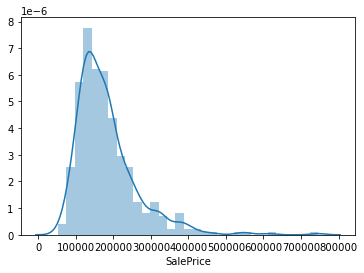

In [186]:
sns.distplot(y_test)

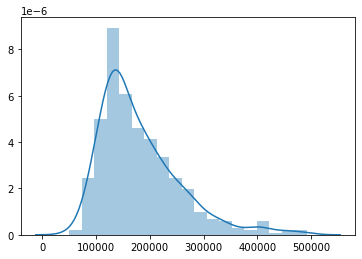

In [187]:
sns.distplot(pred)